In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
import pathlib
import glob

In [2]:
#Orthographic camera model is assumed. 
# The origin lies on the sphere/circle used
# Camera is at (0,0,1)

def calculate_light_vectors(im, sphere_dim, th=200, show=False):
	"""
	Input:-
	im : 	the image of the chrome sphere [height, width, 3] lit with a light source at an angle
	sphere_dim : a vector [xc, yc, r] describing the dimensions of the circle
	th : 	a tuning threshold (0 to 255) that will extract out the
	Returns:-
	l: calculated light source direction	
	"""
	
	im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
	
	xc = sphere_dim[0]
	yc = sphere_dim[1]
	radius = sphere_dim[2]
	print("Read sphere params: ", xc,yc,radius)
	
	#Extract the lit area
	x_indices = []
	y_indices = []
	for i in range(im.shape[0]):
		for j in range(im.shape[1]):
			val = im[i, j]
			if val > th:
				x_indices.append(i)
				y_indices.append(j)
	
	x_med = np.median(x_indices)
	y_med = np.median(y_indices)
	print("Detected point is ({},{})".format(x_med, y_med) )
	
	im2 = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
	im2 = cv2.circle(im2, (int(y_med), int(x_med)), radius=3, color=(0,0,255), thickness=5)
    
	if show == True:
		plt.imshow(im2)
		plt.show()
		#input("Press any key to proceed...")
		plt.pause(0.001)
	#Normal to lit point on sphere
	n = [x_med - xc, y_med - yc]
	n = n/radius
	n3 = math.sqrt(1 - (n[0]*n[0]) - (n[1]*n[1]) )
	
	#Normal vector to the lit point is N
	N = np.array([*n, n3])
	print("\nNormal vector to the lit point is ", N)
	
	#Find light source direction when the viewing angle is (0, 0, 1)
	L = 2 * N[2] * N
	V = [0, 0, 1]
	L = np.subtract(L, V)
	print("Light source direction is ", L)
	
	return L

In [3]:
def collect_light_vectors(folder_path, sphere_file, th, show=False):
	"""
	Input:-
	folder_path : Folder that contains png images of the chrome sphere [height, width, 3] lit with light sources at various angles
	sphere_file : Path of the file describing the dimensions of the circle/sphere. File contains data in the following format [xc, yc, r]
	th    :	a tuning threshold (0 to 255) that will extract out the
	show	 : When True, it will display the detection being made. Press enter to continue after every detection.
					When False, the program focuses of detection process alone and saves the Light source direction list in the same folder
	
	Returns:-
	L_list: calculated light source directions for all images
	"""
	ppath = pathlib.Path(folder_path) / "*.png"
	ppath = glob.glob(str(ppath))

	sphere_dim = np.loadtxt(sphere_file)
	
	L_list = []
	for i, name in enumerate(sorted(ppath) ):
		im = cv2.imread(name)
		L = calculate_light_vectors(im, sphere_dim, th, show)
		L_list.append(L)
		print("Image ", i, ": ", name, " complete.")

	L_list = np.array(L_list).T
	
	np.save(str(pathlib.Path(folder_path) / "Estimated_lightvectors.npy"), L_list)
	np.savetxt(str(pathlib.Path(folder_path) / "Estimated_lightvectors.txt"), L_list )
	
	return np.array(L_list)

Read sphere params:  331.0 419.0 172.5
Detected point is (357.5,463.5)


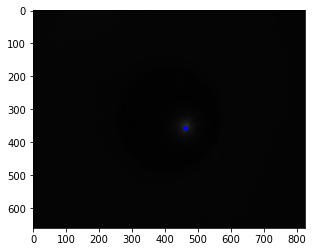


Normal vector to the lit point is  [0.15362319 0.25797101 0.95386103]
Light source direction is  [0.29307035 0.492137   0.81970174]
Image  0 :  ../Data/real_sphere/chrome_sphere_00.png  complete.
Read sphere params:  331.0 419.0 172.5
Detected point is (292.0,448.0)


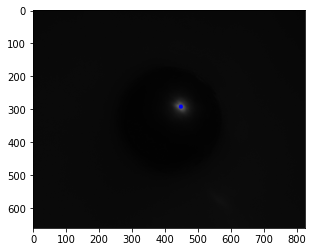


Normal vector to the lit point is  [-0.22608696  0.16811594  0.95949034]
Light source direction is  [-0.4338565   0.32261125  0.84124344]
Image  1 :  ../Data/real_sphere/chrome_sphere_01.png  complete.
Read sphere params:  331.0 419.0 172.5
Detected point is (279.0,398.0)


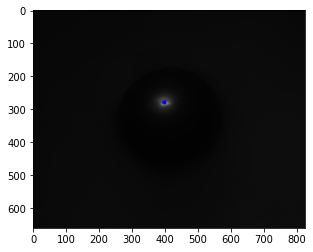


Normal vector to the lit point is  [-0.30144928 -0.12173913  0.94567855]
Light source direction is  [-0.57014823 -0.23025217  0.78861584]
Image  2 :  ../Data/real_sphere/chrome_sphere_02.png  complete.
Read sphere params:  331.0 419.0 172.5
Detected point is (292.0,375.0)


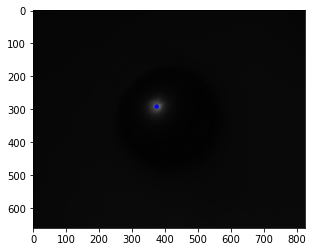


Normal vector to the lit point is  [-0.22608696 -0.25507246  0.94011846]
Light source direction is  [-0.42509704 -0.47959667  0.76764545]
Image  3 :  ../Data/real_sphere/chrome_sphere_03.png  complete.
Read sphere params:  331.0 419.0 172.5
Detected point is (366.0,372.0)


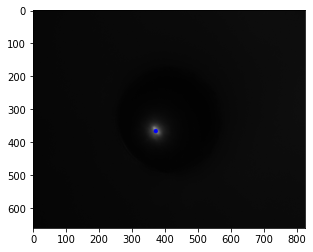


Normal vector to the lit point is  [ 0.20289855 -0.27246377  0.94052946]
Light source direction is  [ 0.38166413 -0.5125204   0.76919135]
Image  4 :  ../Data/real_sphere/chrome_sphere_04.png  complete.
Read sphere params:  331.0 419.0 172.5
Detected point is (382.0,395.0)


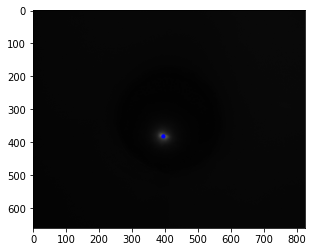


Normal vector to the lit point is  [ 0.29565217 -0.13913043  0.94510979]
Light source direction is  [ 0.55884753 -0.26298707  0.78646503]
Image  5 :  ../Data/real_sphere/chrome_sphere_05.png  complete.
Lights: 
 [[ 0.29307035 -0.4338565  -0.57014823 -0.42509704  0.38166413  0.55884753]
 [ 0.492137    0.32261125 -0.23025217 -0.47959667 -0.5125204  -0.26298707]
 [ 0.81970174  0.84124344  0.78861584  0.76764545  0.76919135  0.78646503]]
All vectors Done


In [4]:
folder_path = r"../Data/real_sphere/"
sphere_file = r"../Data/real_sphere/sphere_dimensions.txt"
th = 48
show = True

#Run
L_list = collect_light_vectors(folder_path, sphere_file, th, show)
print("Lights: \n", L_list)
print("All vectors Done")
